## Analysis description
- This analysis aims to explore the Walmart Sales data to understand top performing branches and products, sales trend of different products, customer behavior. The aims is to study how sales strategies can be improved and optimized. The dataset was obtained from the Kaggle Walmart Sales Forecasting Competition.

- "In this recruiting competition, job-seekers are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store. To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact." source

- Purposes Of The Project
The major aim of this project is to gain insight into the sales data of Walmart to understand the different factors that affect sales of the different branches.

### About Data
- This dataset contains sales transactions from a three different branches of Walmart, respectively located in Mandalay, Yangon and Naypyitaw. The data contains 17 columns and 1000 rows:

**Column include:**

invoice_id		
branch	
city	
customer_type	
gender	
product_line	
unit_price		
quantity	 
VAT	
total	
date	
time	
payment_method	
cogs	
gross_margin_percentage	
gross_income	
rating	


**Product Analysis**
Conduct analysis on the data to understand the different product lines, the products lines performing best and the product lines that need to be improved.

**Sales Analysis**
This analysis aims to answer the question of the sales trends of product. The result of this can help use measure the effectiveness of each sales strategy the business applies and what modifications are needed to gain more sales.

**Customer Analysis**
This analysis aims to uncover the different customers segments, purchase trends and the profitability of each customer segment.

- Create a time_of_day column: to give insight of sales in the Morning, Afternoon and Evening. This will help answer the question on which part of the day most sales are made.
- Create a day_name : that contains the extracted days of the week on which the given transaction took place (Mon, Tue, Wed, Thur, Fri). This will help answer the question on which week of the day each branch is busiest.
- Create a new column named month_name: that contains the extracted months of the year on which the given transaction took place (Jan, Feb, Mar). Help determine which month of the year has the most sales and profit.

#### Business Questions To Answer

How many unique cities does the data have?

In which city is each branch?

**Product**

How many unique product lines does the data have?

What is the most common payment method?

What is the most selling product line?

What is the total revenue by month?

What month had the largest COGS?

What product line had the largest revenue?

What is the city with the largest revenue?

What product line had the largest VAT?

Fetch each product line and add a column to those product line showing "Good", "Bad". Good if its greater than average sales

Which branch sold more products than average product sold?

What is the most common product line by gender?

What is the average rating of each product line?

**Sales**

Number of sales made in each time of the day per weekday

Which of the customer types brings the most revenue?

Which city has the largest tax percent/ VAT (Value Added Tax)?

Which customer type pays the most in VAT?

**Customer**

How many unique customer types does the data have?

How many unique payment methods does the data have?

What is the most common customer type?

Which customer type buys the most?

What is the gender of most of the customers?

What is the gender distribution per branch?

Which time of the day do customers give most ratings?

Which time of the day do customers give most ratings per branch?

Which day of the week has the best avg ratings?

Which day of the week has the best average ratings per branch?


### Loading libraries

In [38]:
#for data manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Import data

In [39]:
data = pd.read_csv("w_salesdata.csv")

### Viewing the first 5 rows and columns in the dataset


In [40]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


### Properties of the dataset

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Observation_____________**
- This dataset contains 1000 rows and 17 columns
- There are no null values
- There are 8 numerical columns and 9 object (string) columns
- The date and time column have an object data type which should be datetime

In [42]:
#converting Date and Time column into datetime
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data['Date'] = pd.to_datetime(data['Date'])

In [43]:
#checking the data type of Time and Date
print(data['Time'].dtype)
print(data['Date'].dtype)

datetime64[ns]
datetime64[ns]


- Both Time and Date columns now have the data type datetime

### Basic statistics

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


**Observation_________**
- The average unit price is ~55.7 dollars. The low standard deviation indicates low variation within the unit prices.
- For quantity, 50% of the quantity purchased by customers is less that 5 in number.
- The average Total amount - (Unit Price * Quantity) + Tax -  spent on a  product is ~323 dollars.
- The average Cost Of Goods is ~308 dollars. This is less that the average of Total amount with is a good sign of a profitable business.
- The gross margin percentage appears to be constant across all rows.
- 50% of the ratings are above 7. Average rating is ~6.97.

### Visualizing the distributions of the numerical columns with histograms

In [45]:
num_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

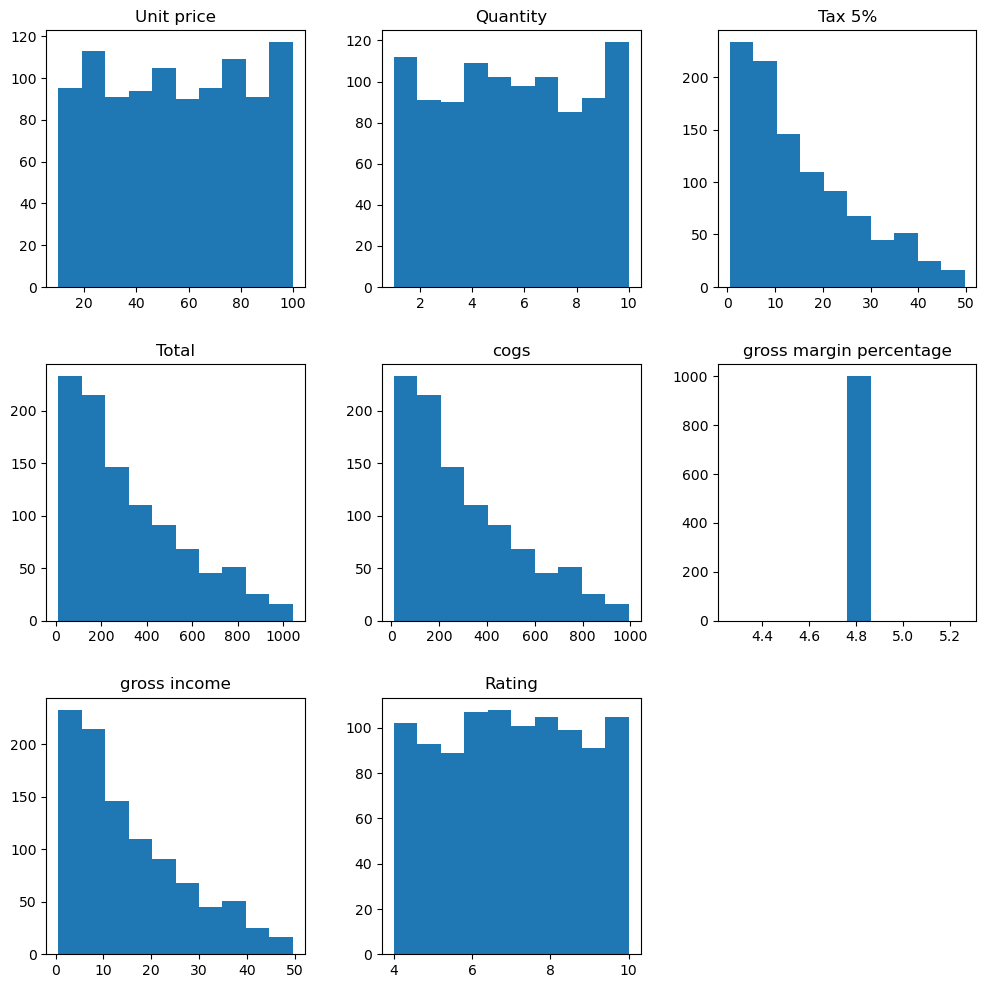

In [46]:
#plotting histograms
data[num_cols].hist(figsize = (12, 12), grid = False)
plt.show()

**Observation______**
- The distributions of Tax, Total, Gross income and Unit price are similarly right skewed. Meaning, that there are more lower prices than there are higher prices
- Unit price, Quantity, and Rating also have similar distributions. They have an approximate uniform distribution - where each value has an approximately equal likelihood of appearing
- As observed earlier, gross margin percentage column has a singular value and hence will be dropped as it adds nothing to this analysis.


In [47]:
#dropping the gross margin percentage column
data.drop('gross margin percentage', axis = 1, inplace = True)

### Let's have a look at the non-numeric columns

In [48]:
cols = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Date']

In [49]:
#checking the distinct values within the non-numeric columns
for columns in cols:
    col_data = data[columns]
    print('\n ',columns)
    print("Unique values: ", col_data.nunique())


  Invoice ID
Unique values:  1000

  Branch
Unique values:  3

  City
Unique values:  3

  Customer type
Unique values:  2

  Gender
Unique values:  2

  Product line
Unique values:  6

  Payment
Unique values:  3

  Date
Unique values:  89


**Observation_______**
- Invoice ID has 1000 unique values. This column would be dropped as it adds nothing to the analysis
- There are 3 unique branches in this dataset
- 3 unique cities
- 2 categories of customers
- 2 distinct genders
- 6 distinct products
- 3 payment options
- 89 distinct dates over the course of time that this dataset was collected

**Dropping the Invoice ID column**

In [50]:
data.drop('Invoice ID', axis = 1, inplace = True)

**Checking the value count of the categorical values**

In [51]:
cols = ['Branch', 'City', 'Customer type', 'Gender', 'Payment', 'Product line']

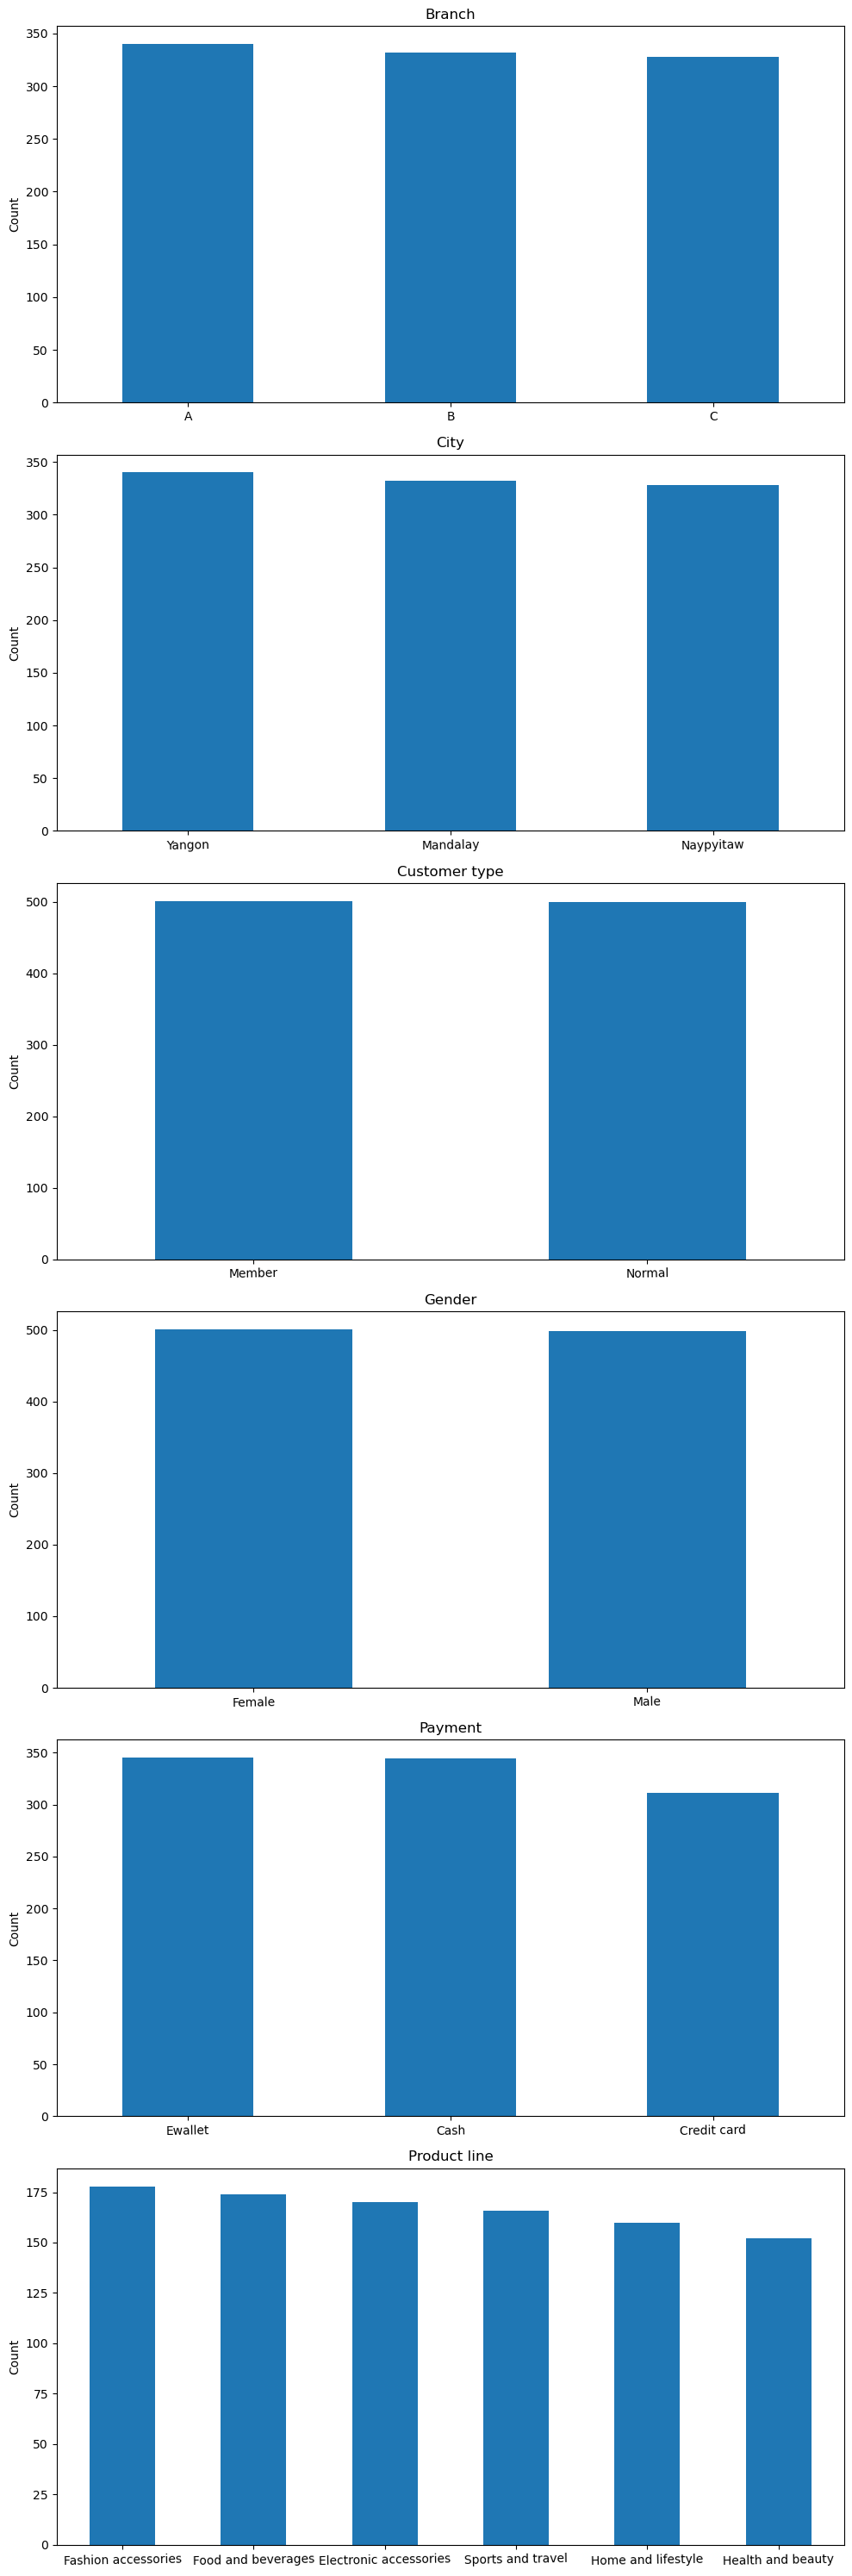

In [52]:
#setting the number of rows and columns
n_rows = 6
n_cols = 1

plt.figure(figsize=(10,30))
for i, columns in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    col_data = data[columns]
    col_data.value_counts().plot(kind = 'bar', ylabel = 'Count', rot =1)
    plt.title(columns)
plt.tight_layout()

**Observations_________**
- Of the 3 branches, branch A is the most frequent
- Of the 3 cities Yangon city occurs the most in this dataset
- The dataset contains more member customers but not by a large amount
- Most frequent gender is female, still not by a great amount
- The 3 highest products in count are Fashion accessories, Food and beverages, and Electronic accessories

### Bivariate analysis


<AxesSubplot:xlabel='City', ylabel='count'>

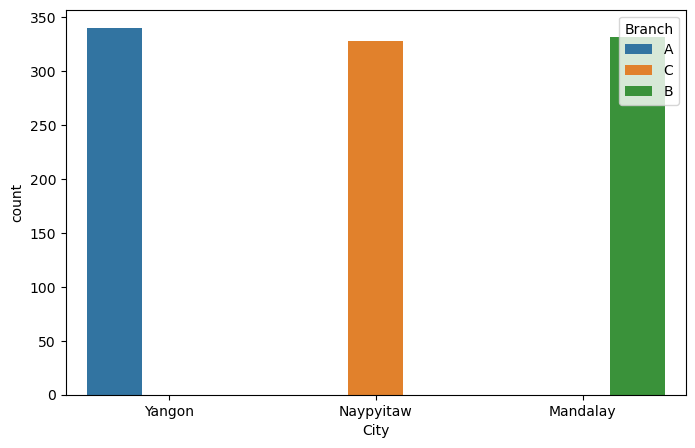

In [53]:
#plotting City against Branch
plt.figure(figsize = (8, 5))
sns.countplot(data = data, x='City', hue='Branch')

**Observation___________**
- Branch A are all situated in Yangon city
- Branch B are all situated in Naypyitaw city
- Branch C are all situated in Mandalay city

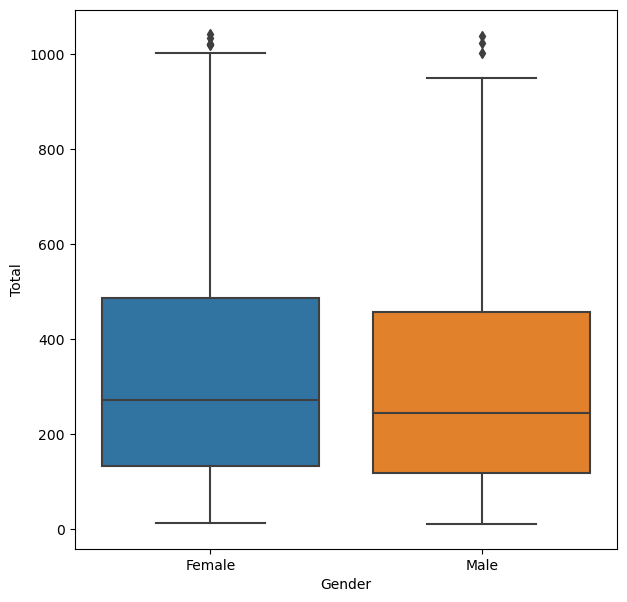

In [54]:
#plotting Gender against total
plt.figure(figsize = (7, 7))
sns.boxplot(data = data, x = 'Gender', y = 'Total')
plt.show()

**Observation____________**
- **Overall, female customers spend more than male customers**

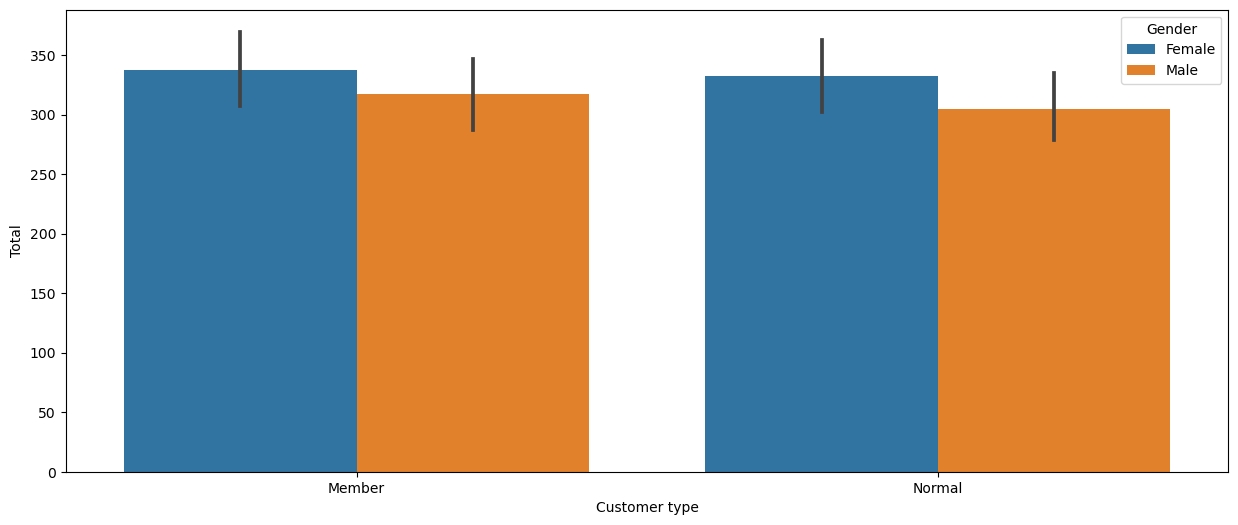

In [55]:
#plotting total, against customer type and Gender  
plt.figure(figsize = (15, 6))
sns.barplot(data = data, x = 'Customer type', y = 'Total', hue = 'Gender')
plt.show()

- Amongst the two categories of customers (member and normal), female customers outperform male customers

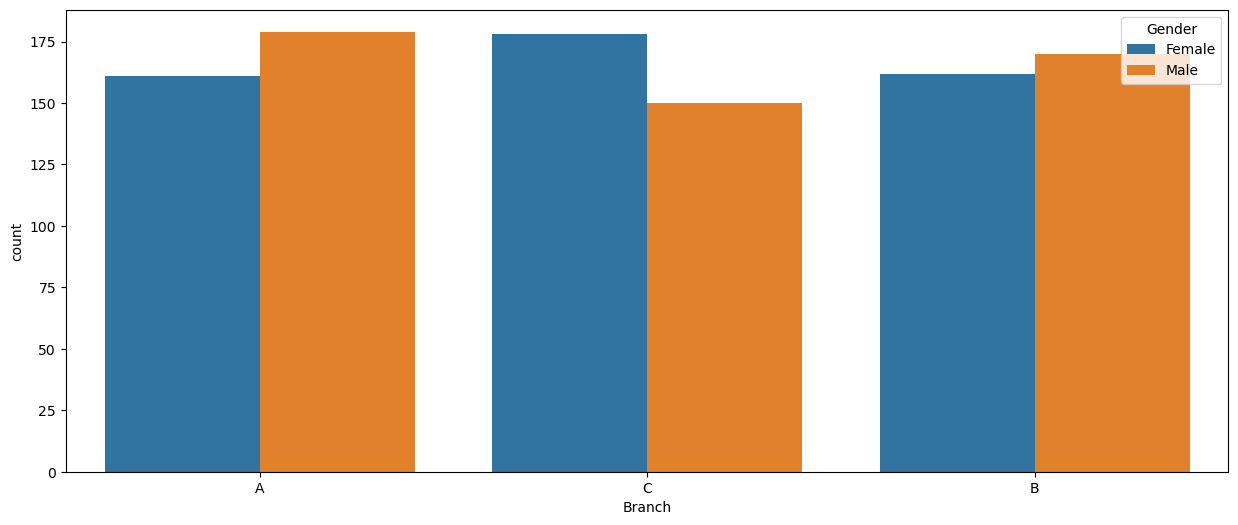

In [74]:
#plotting Gender against branch
plt.figure(figsize = (15, 6))
sns.countplot(data = data, x = 'Branch', hue = 'Gender')
plt.show()

**Observation___________**
- Branch A has more male customers than female
- Branch B has more male customers than female
- Branch C has more female customer than male

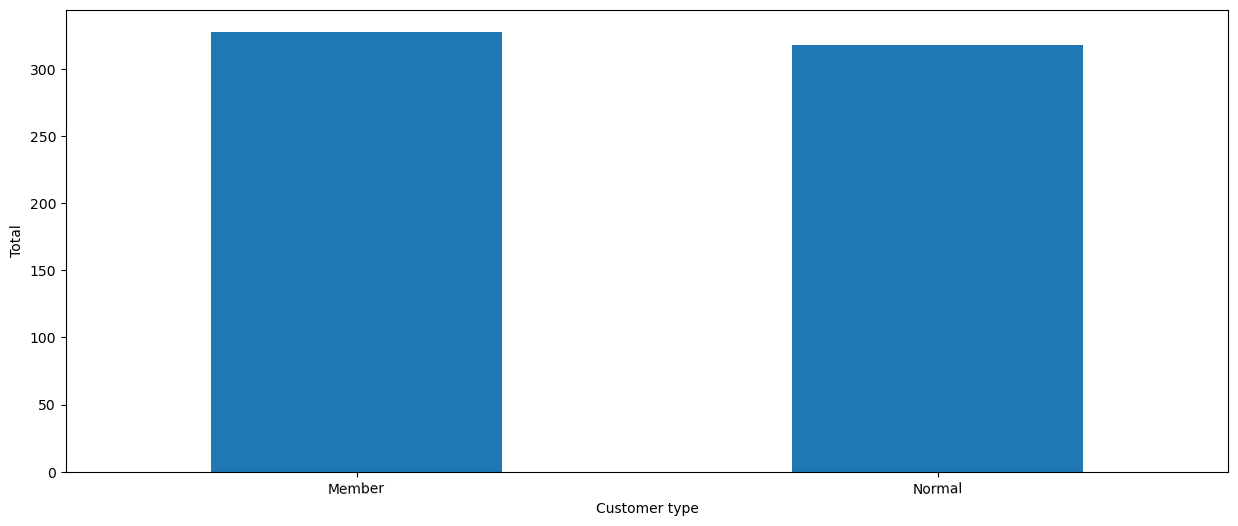

In [57]:
# plotting customer type against total
plt.figure(figsize = (15, 6))
data.groupby('Customer type')['Total'].mean().plot(kind = 'bar', ylabel = 'Total', rot = 1)
plt.show()

**Observation_________**
- **On average member customers spend more than normal customer, though the difference in spending is immaterial**

### **Let's have a look at the products that generate the most revenue**

<AxesSubplot:xlabel='Product line', ylabel='Total'>

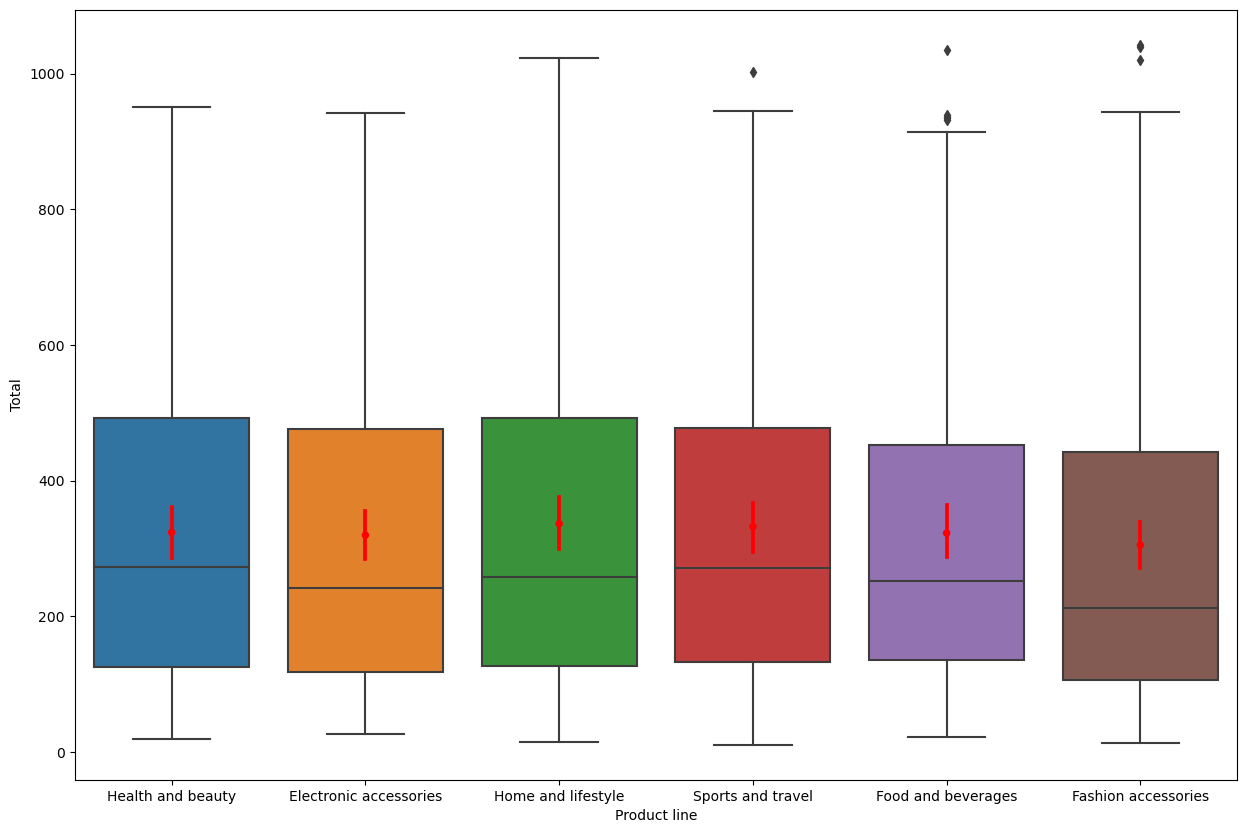

In [60]:
#plotting product line against total
plt.figure(figsize=(15,10))

#plotting the boxplot
sns.boxplot(data = data, x = 'Product line', y = 'Total')

# Overlay the mean of each boxplot
sns.pointplot(data=data, x='Product line', y='Total', estimator=np.mean, color='red', markers='.', join=False)

**Observation__________**

- **Home and lifestyle products, Fashion accessories, and Food and beverages bring in the most revenue. However, the average of Fashion accessories is low compared to others and only a certain group of customers (outliers) spent a lot on food and beverages.**

### Multivariate analysis

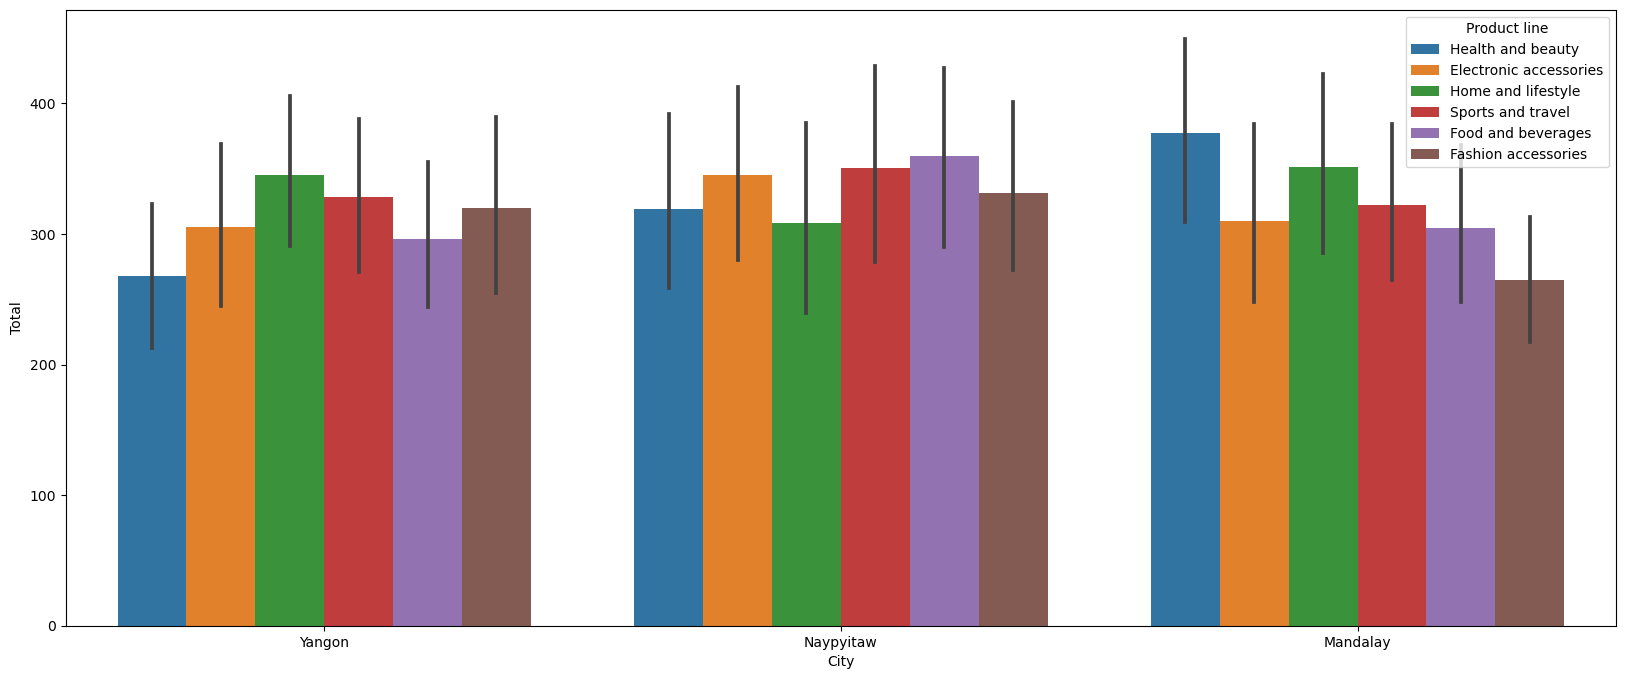

In [61]:
#plotting city, against total and product line`
plt.figure(figsize = (20, 8))
sns.barplot(data = data, x='City', y='Total', hue='Product line')
plt.show()

**Observation___________**
- On average, the products bringing in the most revenue in Yangon city (branch A) are: **Home and lifestyle products, Sports and travel products and Fashion accessories.**
- In Mandalay city (branch B), they are: **Health and beauty products, Home and lifestyle products, and Sports and travel products.**
- In Naypyitaw city (branch C), they are: **Food and beverages, Sports and travel and Electronic accessories.**

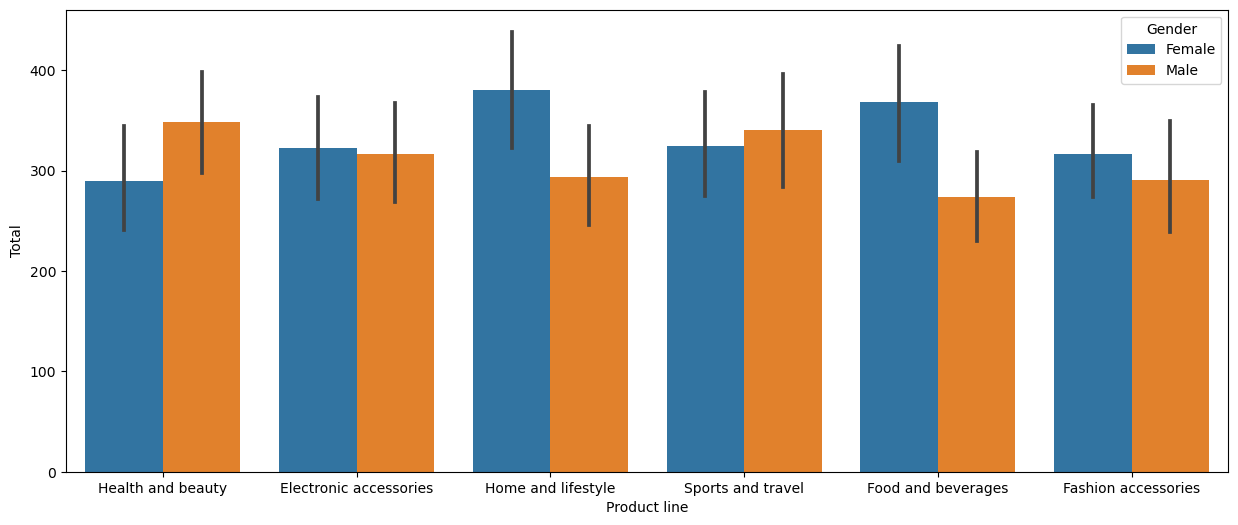

In [79]:
#plotting product line against total and gender
plt.figure(figsize = (15, 6))
sns.barplot(data = data, x='Product line', y='Total', hue='Gender')
plt.show()

**Observations_____________**
- On average male customers spend more on Health and beauty products and Sports and travel products than female customers.
- On average female customers spend more on Electronic accessories, Home and lifestyle products, Food and beverages products and Fashion accessories than male customers.

### Feature engineering

**Creating a month, a day, and a time of the day column** as indicated in the analysis description


In [67]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [68]:
data['Time_of_day'] = data['Time'].apply(lambda x: 'Morning' if 5 <= x.hour <12 else
                                                   'Afternoon' if 12 <= x.hour <17 else
                                                   'Evening' if 17 <= x.hour <21 else
                                                   'Night') 

<AxesSubplot:xlabel='Time of day', ylabel='Count'>

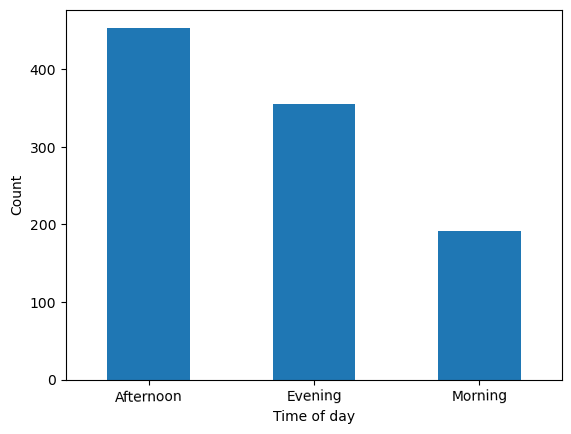

In [72]:
#checking the value count ot Time_of_day
data['Time_of_day'].value_counts().plot(kind = 'bar', xlabel = 'Time of day', ylabel = 'Count', rot = 1)

**Afternoon is the most frequent time of the day**

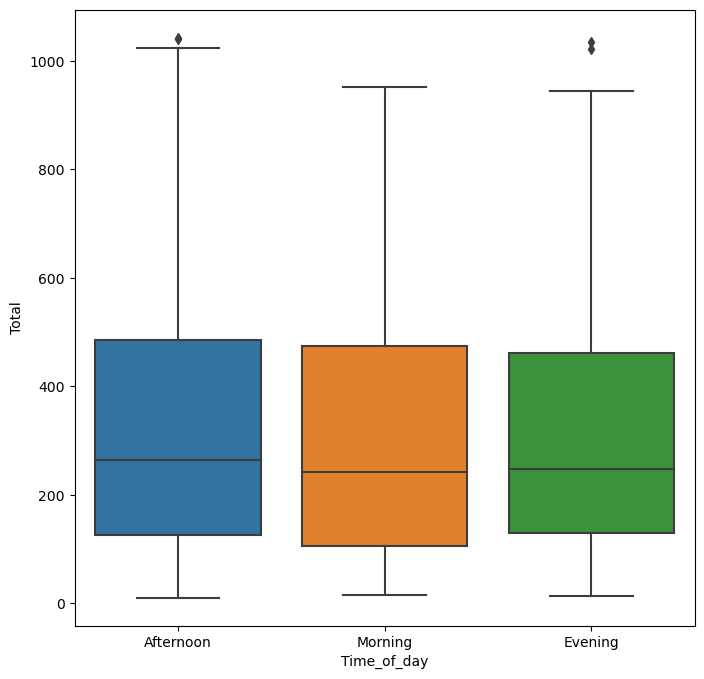

In [28]:
#plotting Time_of_day against total
plt.figure(figsize = (8, 8))
sns.boxplot(data = data, x='Time_of_day', y='Total')
plt.show()

**Observation_______**
- Afternoon time has to most transactions - this could be because afternoon time has the most occurrence in this dataset 
- Mornings have the least transactions

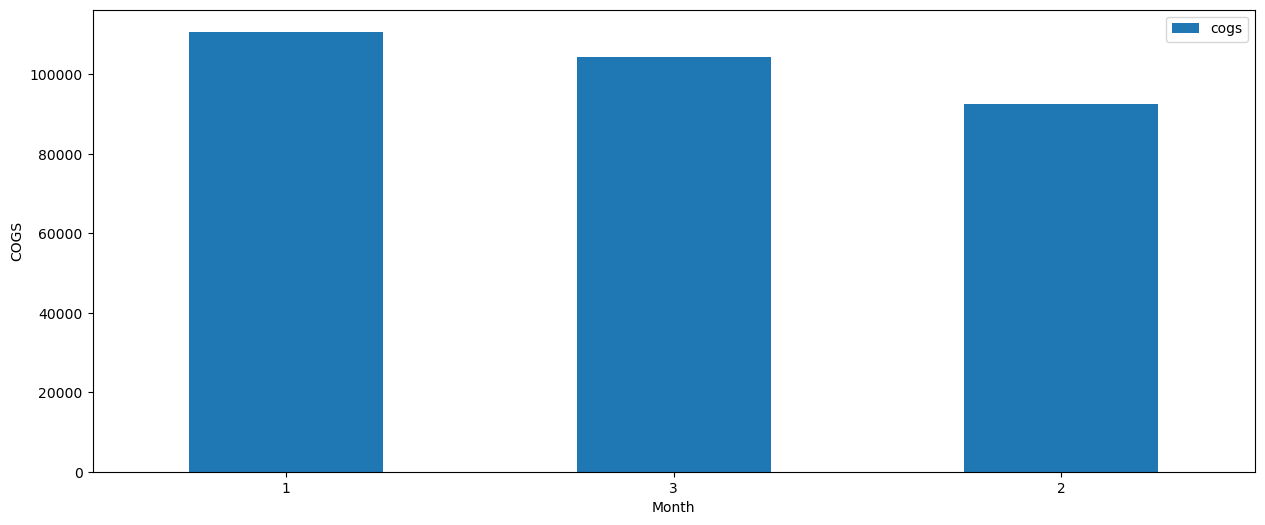

In [83]:
#month against cost of goods sold
data[['Month', 'cogs']].groupby('Month').sum().sort_values(by = 'cogs', ascending = False).plot(kind = 'bar', 
                                                                                                figsize = (15, 6),
                                                                                                ylabel = 'COGS',
                                                                                                rot=1)
plt.show()

**Observation________**
- January is the month with the highest cost of goods and February has the lowest cost of goods sold

<AxesSubplot:xlabel='Month', ylabel='Total'>

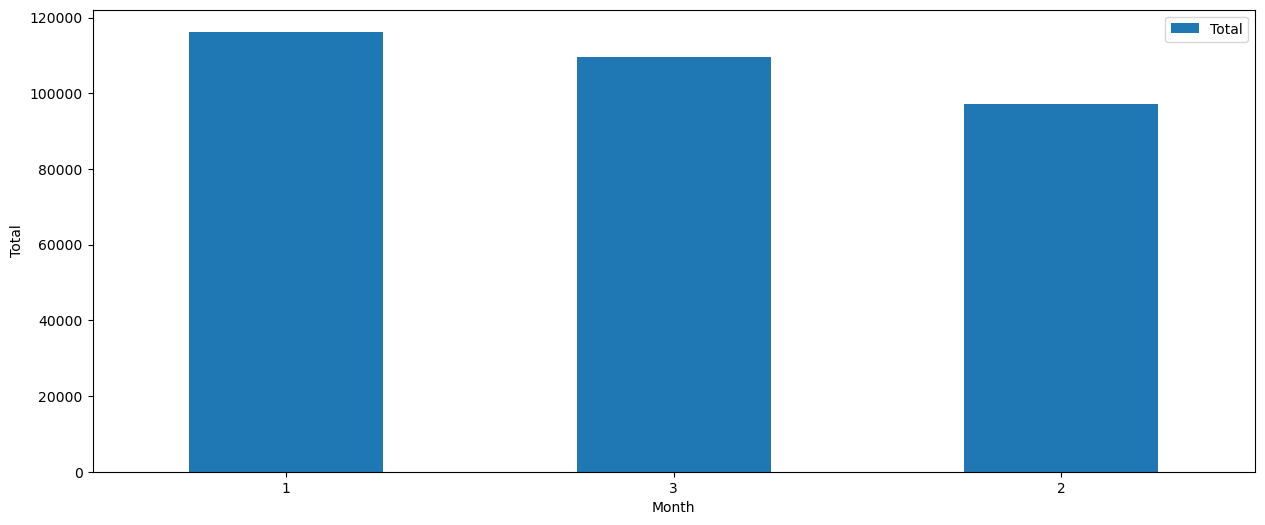

In [84]:
#plotting month agains total
data[['Month', 'Total']].groupby('Month').sum().sort_values(by = 'Total', ascending = False).plot(kind = 'bar',
                                                                                                  figsize = (15, 6),
                                                                                                  ylabel = 'Total',
                                                                                                  rot = 1)

**Observation_____________**
- January is the month with the largest revenue and February has the lowest revenue.

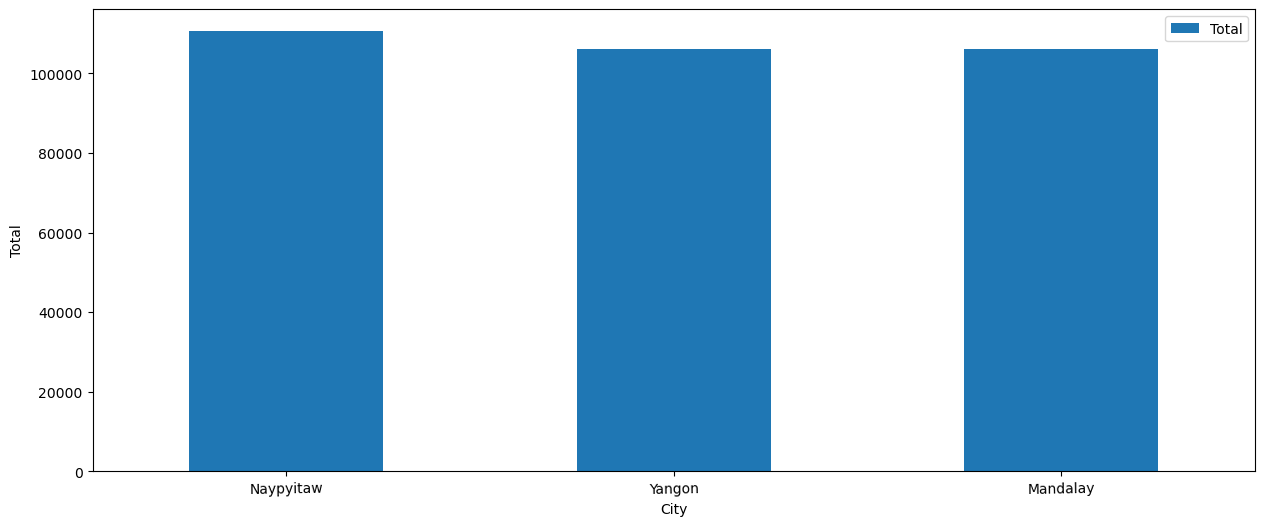

In [62]:
#plotting city against total
data[['City', 'Total']].groupby('City').sum().sort_values(by = 'Total', ascending = False).plot(kind = 'bar', 
                                                                                                figsize = (15, 6),
                                                                                                ylabel = 'Total',
                                                                                                rot = 1)
plt.show()

**Observation____________**
- **Naypyitaw is the city that brings in the most revenue** (which is interesting considering that Naypyitaw is the list frequent city in the dataset).
- Yangon and Mandalay city have approximately the same revenue.

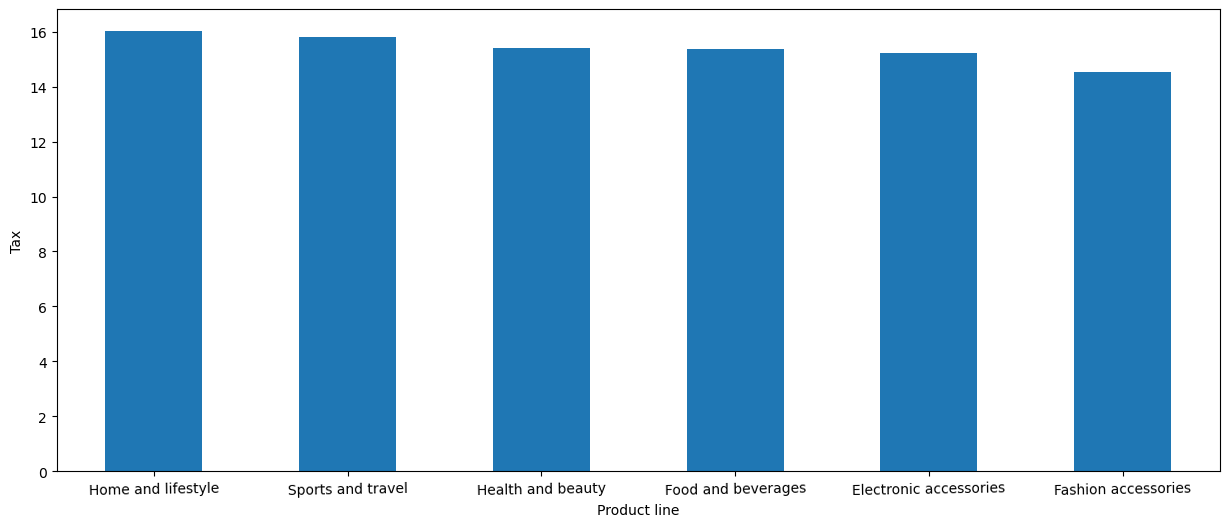

In [63]:
#plotting product line against tax
data.groupby('Product line')['Tax 5%'].mean().sort_values(ascending = False).plot(kind = 'bar',
                                                                                  figsize = (15, 6), 
                                                                                  ylabel = 'Tax',
                                                                                  rot = 1)
plt.show()

**Observation___________**
- On average Home and lifestyle products have the most tax, followed by sports and travel products, and health and beauty products

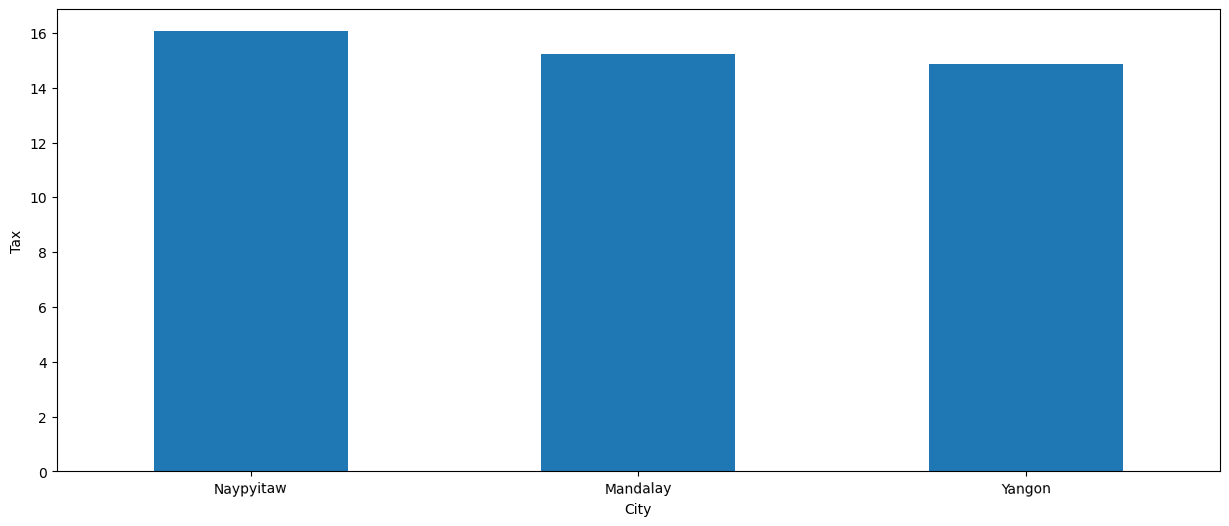

In [64]:
#plotting City against tax
data.groupby('City')['Tax 5%'].mean().sort_values(ascending = False).plot(kind = 'bar',
                                                                          figsize = (15, 6), 
                                                                          ylabel = 'Tax',
                                                                          rot = 1)
plt.show()

**Observation__________**
- **On average Naypyitaw pays the most tax on products.**

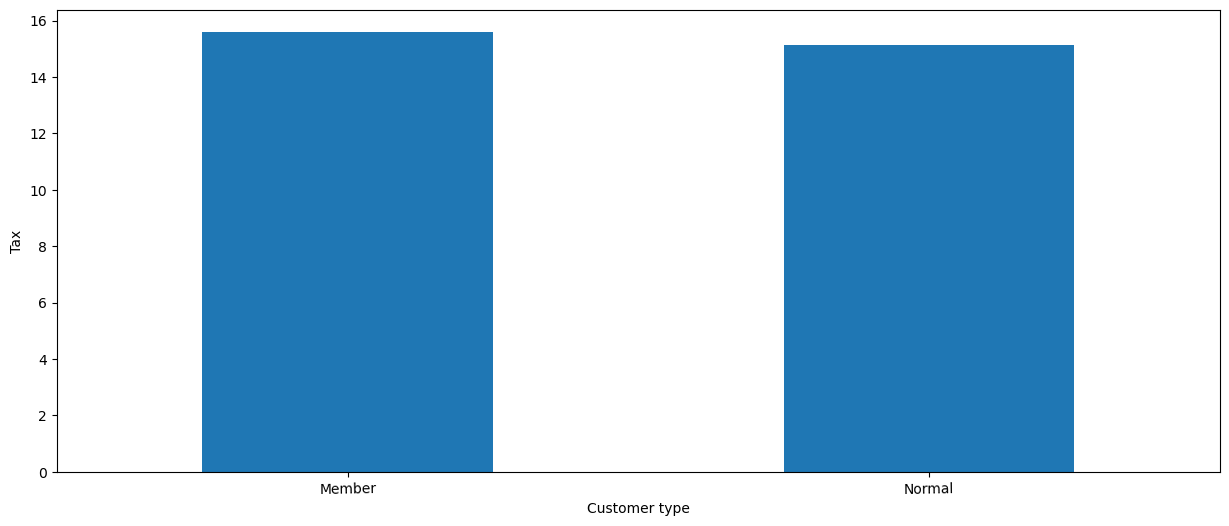

In [65]:
#plotting cutomer type against tax
data.groupby('Customer type')['Tax 5%'].mean().sort_values(ascending = False).plot(kind = 'bar',
                                                                                  figsize = (15, 6), 
                                                                                  ylabel = 'Tax',
                                                                                  rot = 1)
plt.show()

**Observation___________**
- On average Member Customer Type pay more tax than Normal Customer Type but, this could be because there are more Member customers in this dataset than Normal customers.

<AxesSubplot:xlabel='Product line', ylabel='Average ratings'>

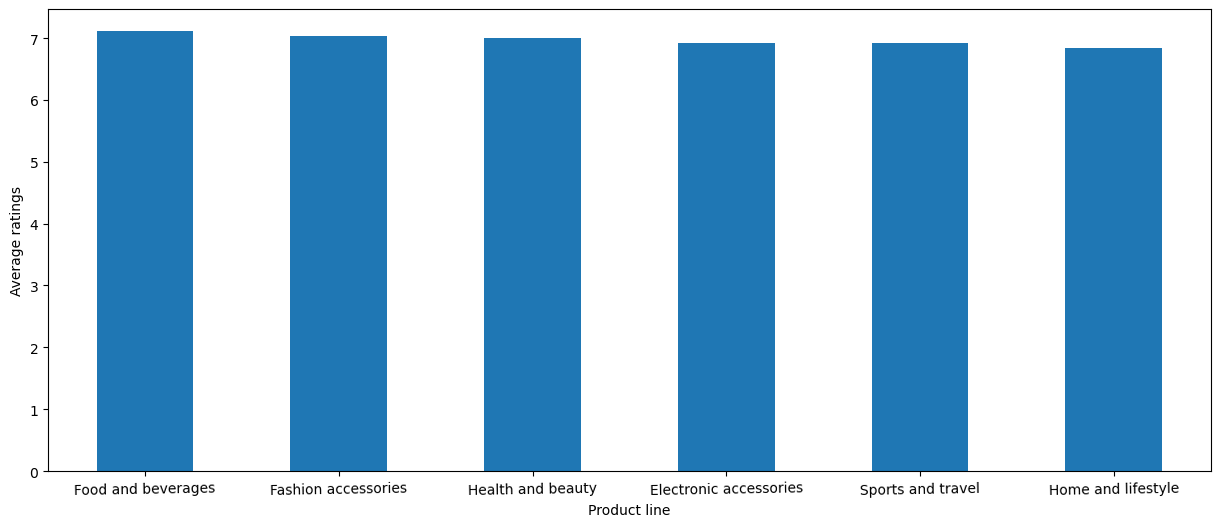

In [89]:
#plotting the average of products
data.groupby('Product line')['Rating'].mean().sort_values(ascending = False).plot(kind = 'bar',
                                                                                  figsize = (15, 6), 
                                                                                  ylabel = 'Average ratings',
                                                                                  rot = 1)

**Observations____________**
- On average food and beverages is the highest rated product, closely followed by fashion accessories and health and beauty

<AxesSubplot:xlabel='Time_of_day', ylabel='Average ratings'>

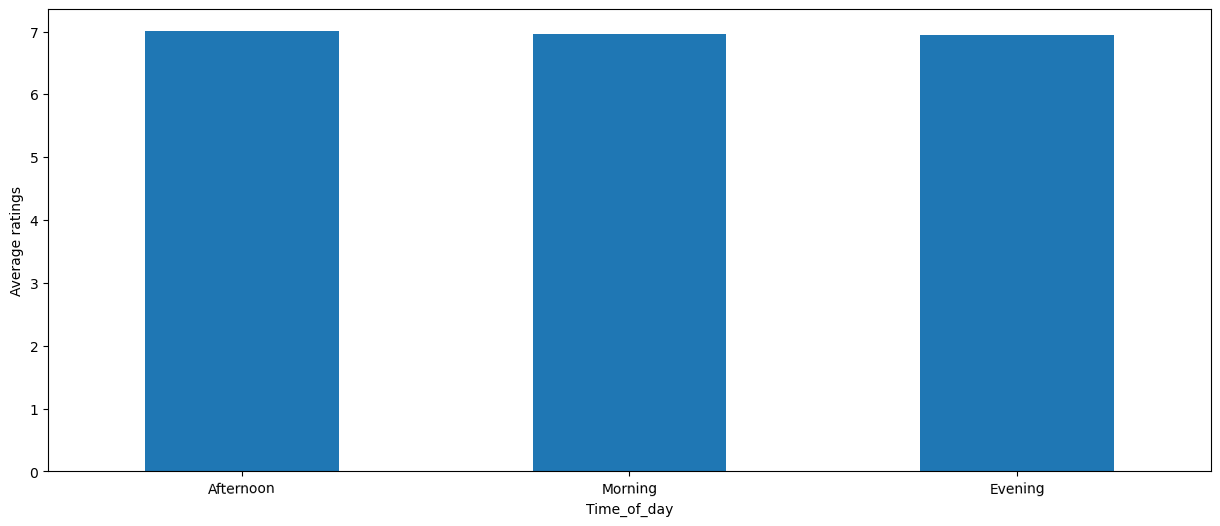

In [90]:
#plotting the average rating of products
data.groupby('Time_of_day')['Rating'].mean().sort_values(ascending = False).plot(kind = 'bar',
                                                                      figsize = (15, 6), 
                                                                      ylabel = 'Average ratings',
                                                                      rot = 1)

**Observation______________**
- On average customers give the most ratings in the afternoon.

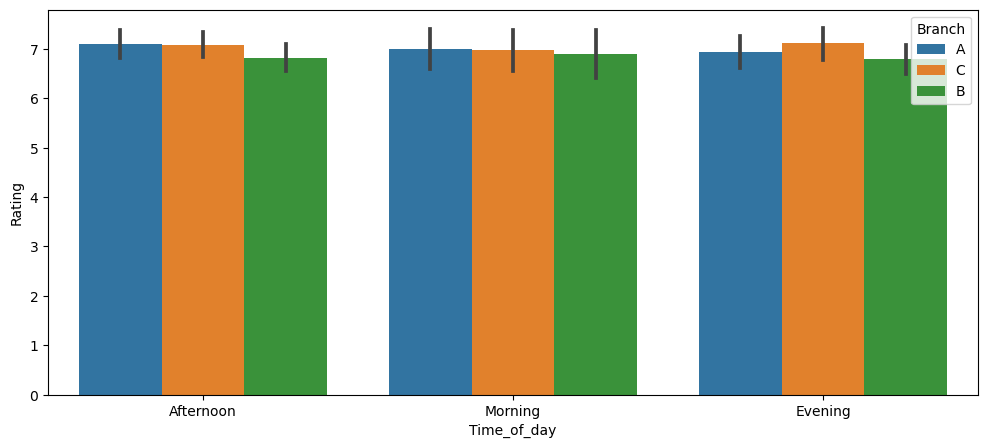

In [91]:
#plotting time_of_day against ratings and branch
plt.figure(figsize=(12,5))
sns.barplot(data = data, x = 'Time_of_day', y = 'Rating', hue = 'Branch')
plt.show()

**Observation______________**
- In the afternoon time, branch A and C gets the most ratings
- In the morning time, the rating across all 3 branches are nearly uniform
- In the evening time, branch C gets the most ratings

### Checking for correlation

In [92]:
data_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']

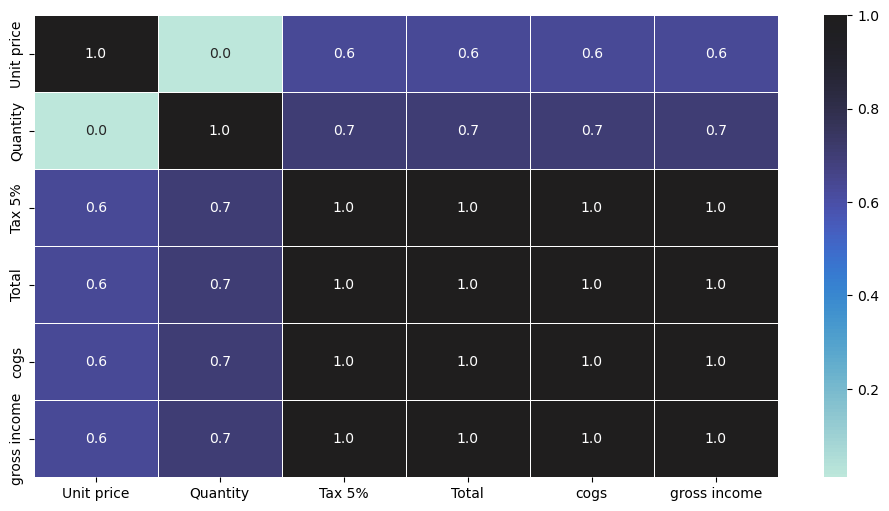

In [93]:
plt.figure(figsize=(12,6))
sns.heatmap(data[data_columns].corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

**Observation_________**
- Apart from unit price and quantity, every other item is strongly correlated. This is to be expected because, the quantity of products a customer buys directly affects the revenue, cogs, and tax.

### Checking trend with date

<AxesSubplot:xlabel='Date', ylabel='Average ratings'>

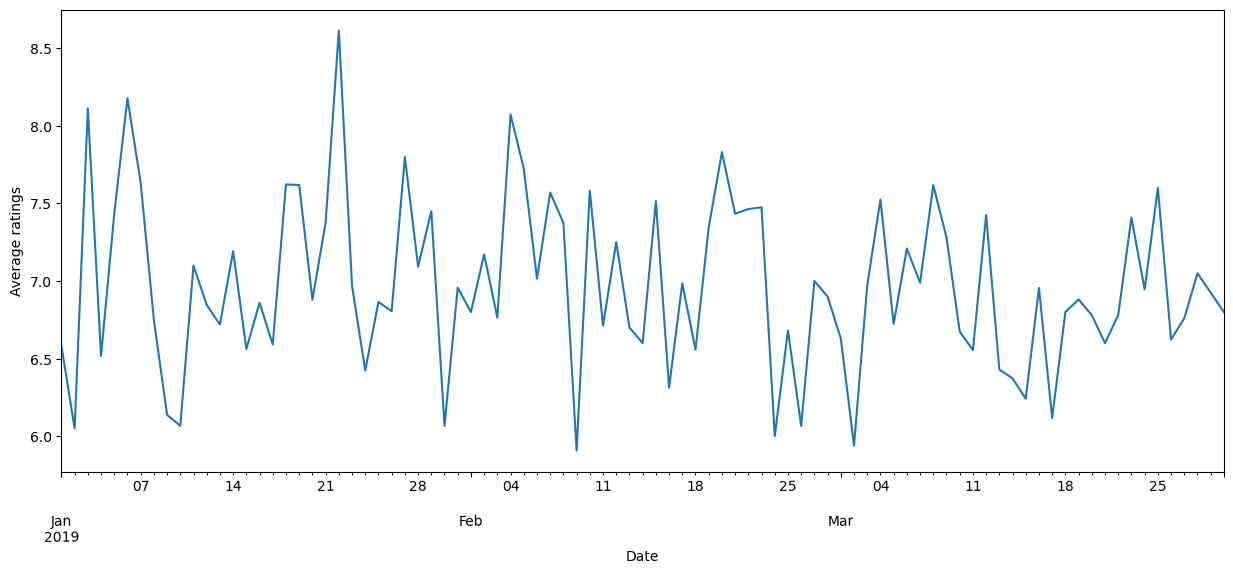

In [94]:
#plotting the Date against ratings
data.groupby('Date')['Rating'].mean().plot(kind = 'line', figsize = (15, 6), ylabel = 'Average ratings', rot = 1)

**Observation____________**
- There is no trend between ratings and date. Customers likely rate products sporadically.

<AxesSubplot:xlabel='Date', ylabel='Total'>

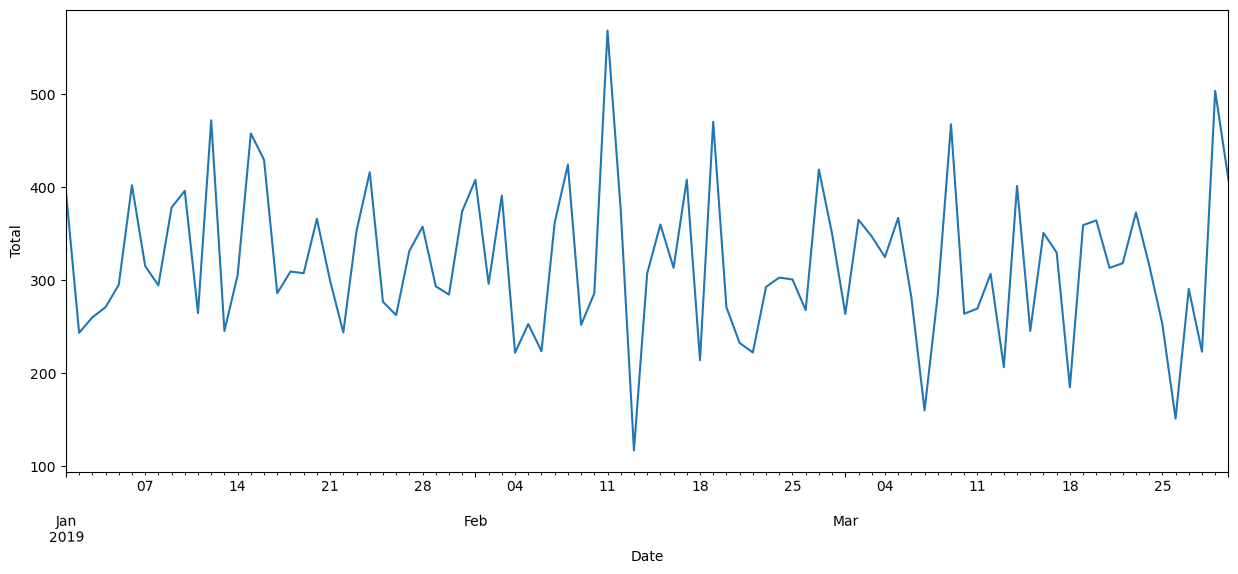

In [95]:
#plotting the date of total
data.groupby('Date')['Total'].mean().plot(kind = 'line', figsize = (15, 6), ylabel = 'Total', rot = 1)

**Observation__________**
- In the course of the 3 months this data was collected the revenue has fluctuated drastically. More data would be needed to establish a more concise trend
- On February 12th a huge leap can be observed in the revenue while on the 13th the is an equally huge fall. More data would be needed to determine the cause of these drastic changes.

<AxesSubplot:xlabel='Date', ylabel='Total'>

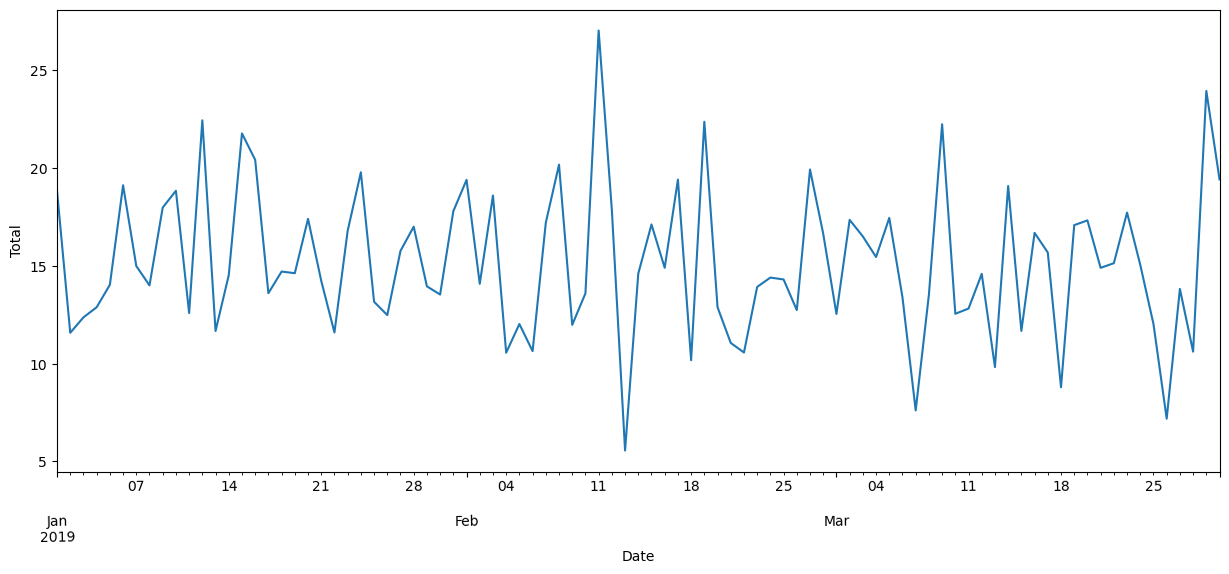

In [96]:
#plotting the date of total
data.groupby('Date')['gross income'].mean().plot(kind = 'line', figsize = (15, 6), ylabel = 'Total', rot = 1)

**Observation__________**
- The gross income over date is the same as the total revenue. More data is needed.

In [97]:
#calculating the average total and average cogs
total_goods_sold = data.groupby('Product line')['Total'].mean()
avg_goods_sold = data.groupby('Product line')['cogs'].mean()

# Create a DataFrame from the total and average costs
goods_sold = pd.concat([total_goods_sold, avg_goods_sold], axis=1, keys=['Total_sold', 'Average_cost'])

#lambda function to classify Total_sold and Average_cost and add the column classification to goods_sold
goods_sold['classification'] = goods_sold.apply(lambda x: 'Good' if x['Total_sold'] > x['Average_cost'] else 'Bad', axis = 1)
goods_sold

,Total_sold,Average_cost,classification
Product line,,,
Electronic accessories,319.632538,304.411941,Good
Fashion accessories,305.089298,290.561236,Good
Food and beverages,322.671517,307.306207,Good
Health and beauty,323.643020,308.231447,Good
Home and lifestyle,336.636956,320.606625,Good
Sports and travel,332.065220,316.252590,Good


**Observation____________**
- On average all products are sold higher than their average cost. This will minimize any possibilities of loss

### Conclusion
- Despite Naypyitaw having the least frequency it has the most revenue. Of the male and female customers in Naypyitaw female customers spend more and are the most frequent. 
- More data is needed for further time analysis into the revenue.
- Health and beauty products are performing poorly in Yangon city - branch A - in comparison to other products, and in Mandalay city - branch C - fashion accessories are performing just as poorly.
- Female customers both within the Normal customer type and Member customer type bring in more revenue than male customers.